In [2]:
# https://github.com/plaidml/plaidml
# https://informatics.sydney.edu.au/blogs/amdgpu/

# Install the plaidml backend
import plaidml.keras
plaidml.keras.install_backend()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [3]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [4]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 450, 400, 350, 300, 250, 200, 150, 100, 50, 25]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

INFO:plaidml:Opening device "opencl_amd_gfx902.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 450)               230850    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 400)               180400    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 350)               140350    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 300)               105300    
_________________________________________________________________
hidden_layer6 (Dense)        (None, 250)               75250     
__________

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 29s 589us/step - loss: 2.0688 - acc: 0.2000 - val_loss: 1.9409 - val_acc: 0.2506
Epoch 2/100
50000/50000 [==============================] - 12s 245us/step - loss: 1.8662 - acc: 0.3060 - val_loss: 1.8596 - val_acc: 0.3228
Epoch 3/100
50000/50000 [==============================] - 12s 242us/step - loss: 1.7931 - acc: 0.3449 - val_loss: 1.7603 - val_acc: 0.3652
Epoch 4/100
50000/50000 [==============================] - 12s 240us/step - loss: 1.7035 - acc: 0.3839 - val_loss: 1.6584 - val_acc: 0.4056
Epoch 5/100
50000/50000 [==============================] - 12s 242us/step - loss: 1.6394 - acc: 0.4084 - val_loss: 1.6096 - val_acc: 0.4244
Epoch 6/100
50000/50000 [==============================] - 12s 242us/step - loss: 1.5812 - acc: 0.4309 - val_loss: 1.5792 - val_acc: 0.4455
Epoch 7/100
50000/50000 [==============================] - 13s 257us/step - loss: 1.5477 - acc: 0.4461 - val_l

Epoch 59/100
50000/50000 [==============================] - 12s 241us/step - loss: 0.2862 - acc: 0.9024 - val_loss: 2.8526 - val_acc: 0.4837
Epoch 60/100
50000/50000 [==============================] - 12s 243us/step - loss: 0.2620 - acc: 0.9098 - val_loss: 2.9178 - val_acc: 0.4849
Epoch 61/100
50000/50000 [==============================] - 12s 243us/step - loss: 0.2789 - acc: 0.9045 - val_loss: 3.0297 - val_acc: 0.4738
Epoch 62/100
50000/50000 [==============================] - 12s 241us/step - loss: 0.2547 - acc: 0.9136 - val_loss: 2.8527 - val_acc: 0.4868
Epoch 63/100
50000/50000 [==============================] - 12s 240us/step - loss: 0.2632 - acc: 0.9105 - val_loss: 2.9900 - val_acc: 0.4833
Epoch 64/100
50000/50000 [==============================] - 12s 242us/step - loss: 0.2535 - acc: 0.9134 - val_loss: 2.7296 - val_acc: 0.4798
Epoch 65/100
50000/50000 [==============================] - 12s 241us/step - loss: 0.2388 - acc: 0.9184 - val_loss: 3.0081 - val_acc: 0.4807
Epoch 66/100


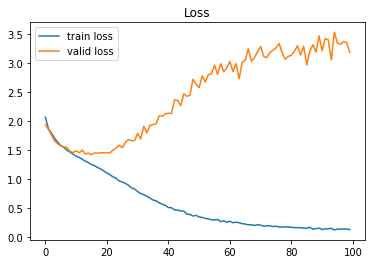

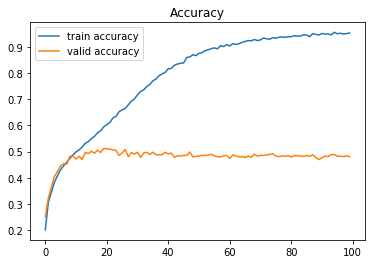

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]

valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()